### Задача:

Построить модель полносвязной и сверточной нейронной сети, которая будет отличать маффин от чихуахуа. Необходимо достичь точности (Accuracy) на тестовом датасете  > 85 % с использованием любой архитектуры нейронной сети

### План решения:

1. Загрузите данные так, как это было показано в видеоуроках или любым другим известным вам способом.
2. Проведите разбиение на тренировочные и тестовые данные.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Rescaling, BatchNormalization, Dropout

In [2]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  'train',
  image_size=(128, 128),
  batch_size=32)

Found 4733 files belonging to 2 classes.


In [3]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  'test',
  image_size=(128, 128),
  batch_size=32)

Found 1184 files belonging to 2 classes.


In [4]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [5]:
val_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

3. Реализуйте функцию, в которой вы будете определять архитектуру полносвязной модели нейронной сети без использования слоев свёртки. Функция должна возвращать скомпилированную модель и иметь названия fcc_nn(fully-connected_neural_network). Обучите модель нейронной сети, измеряя точность на каждой эпохе с помощью тестовой выборки. 

In [6]:
# Функция для создания полносвязной нейронной сети без использования слоев свертки
def fcc_nn():
    model = Sequential()
    model.add(Flatten(input_shape=(128, 128, 3)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [7]:
# Обучение полносвязной нейронной сети
model_fcc = fcc_nn()

history_fcc = model_fcc.fit(train_ds, validation_data=val_ds, epochs=20)

C:\Users\susli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 109s 653ms/step - accuracy: 0.5352 - loss: 961.1036 - val_accuracy: 0.5912 - val_loss: 186.3275
Epoch 2/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 51s 346ms/step - accuracy: 0.6530 - loss: 115.3564 - val_accuracy: 0.5743 - val_loss: 93.1861
Epoch 3/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 54s 368ms/step - accuracy: 0.6263 - loss: 95.1637 - val_accuracy: 0.6715 - val_loss: 48.0645
Epoch 4/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 58s 393ms/step - accuracy: 0.7216 - loss: 28.2977 - val_accuracy: 0.7323 - val_loss: 16.0937
Epoch 5/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 55s 374ms/step - accuracy: 0.7363 - loss: 16.2737 - val_accuracy: 0.5583 - val_loss: 48.7405
Epoch 6/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 61s 414ms/step - accuracy: 0.5713 - loss: 145.8936 - val_accuracy: 0.5802 - val_loss: 40.2926
Epoch 7/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 40s 268ms/step - accuracy: 0.6512 - loss: 15.1035 - val_accuracy: 0.6968 - val_loss: 4.8908
Epoch 8/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 36s 242ms/step - accuracy

In [22]:
# Получаем индекс максимальной валид. метрики 
best_epoch = history_fcc.history['val_accuracy'].index(max(history_fcc.history['val_accuracy']))

# Выводим лучшую валид. метрику
best_val_accuracy = history_fcc.history['val_accuracy'][best_epoch]
print(f'Лучшая валидационная точность достигнута на эпохе {best_epoch + 1}: {best_val_accuracy:.4f}')


Лучшая валидационная точность достигнута на эпохе 12: 0.7399


4. Постройте график зависимости ошибки и точности полносвязной нейронной сети в зависимости от эпох.

In [12]:
def check_metrics(history, figure_name):

    train = history.history[f'{figure_name}']
    val = history.history[f'val_{figure_name}']

    epochs = range(1, len(train) + 1)
    plt.plot(epochs, train, label=f'Training {figure_name}', color=(1.0, 0.0, 0.0, 1))
    plt.plot(epochs, val, 'b', label=f'Validation {figure_name}')
    plt.title(f'Training and Validation {figure_name}')
    plt.xlabel('Epochs')
    plt.ylabel(f'{figure_name}')
    plt.legend()
    plt.show()

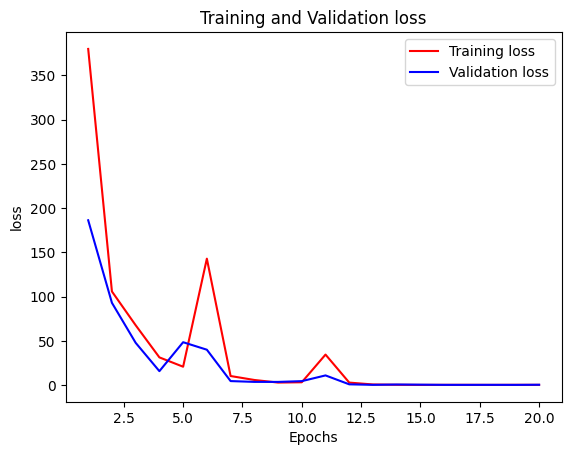

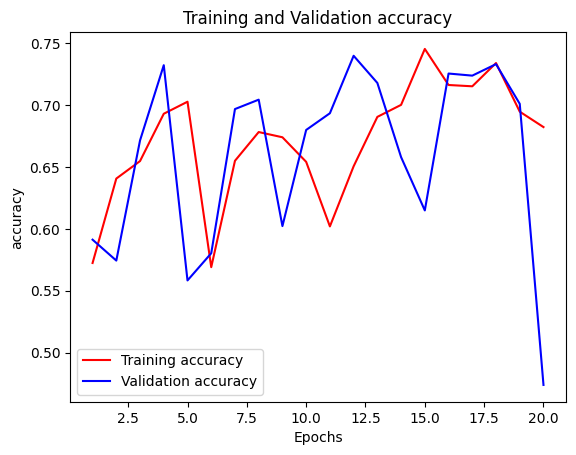

In [13]:
check_metrics(history_fcc, 'loss')
check_metrics(history_fcc, 'accuracy')

5. Реализуйте функцию, в которой вы будете определять архитектуру полносвязной модели нейронной сети, с использованием слоев свёртки, регуляризации, препроцессинга изображений(Rescaling). Функция должна возвращать скомпилированную модель и иметь названия conv_nn(convolutional_neural_network). Обучите модель нейронной сети, измеряя точность на каждой эпохе с помощью тестовой выборки. 

In [14]:
# Функция для создания полносвязной нейронной сети с использованием слоев свертки, регуляризации, препроцессинга изоражений
def conv_nn():
    model = Sequential()
    model.add(Rescaling(1./255))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(1, activation='sigmoid'))

    # Компиляция модели
    model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
    
    return model

In [15]:
# Обучение полносвязной нейронной сети
model_conv = conv_nn()

history_conv = model_conv.fit(train_ds, validation_data=val_ds, epochs=20)

Epoch 1/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 664s 4s/step - accuracy: 0.7397 - loss: 0.5464 - val_accuracy: 0.8252 - val_loss: 0.4915
Epoch 2/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 556s 4s/step - accuracy: 0.8721 - loss: 0.3150 - val_accuracy: 0.8429 - val_loss: 0.4003
Epoch 3/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 546s 4s/step - accuracy: 0.9105 - loss: 0.2282 - val_accuracy: 0.8328 - val_loss: 0.5599
Epoch 4/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 549s 4s/step - accuracy: 0.9418 - loss: 0.1600 - val_accuracy: 0.8311 - val_loss: 0.5071
Epoch 5/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 541s 4s/step - accuracy: 0.9721 - loss: 0.0974 - val_accuracy: 0.8834 - val_loss: 0.3790
Epoch 6/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 546s 4s/step - accuracy: 0.9681 - loss: 0.0837 - val_accuracy: 0.6402 - val_loss: 1.7805
Epoch 7/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 566s 4s/step - accuracy: 0.9825 - loss: 0.0580 - val_accuracy: 0.7804 - val_loss: 0.8925
Epoch 8/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 575s 4s/step - accuracy: 0.9838 - loss: 0.0502 - val_accu

In [23]:
# Получаем индекс максимальной валид. метрики 
best_epoch_conv = history_conv.history['val_accuracy'].index(max(history_conv.history['val_accuracy']))

# Выводим лучшую валид. метрику
best_val_accuracy_conv = history_conv.history['val_accuracy'][best_epoch_conv]
print(f'Лучшая валидационная точность достигнута на эпохе {best_epoch_conv + 1}: {best_val_accuracy_conv:.4f}')


Лучшая валидационная точность достигнута на эпохе 9: 0.8978


6. Постройте график зависимости ошибки и точности свёрточной нейронной сети в зависимости от эпох.

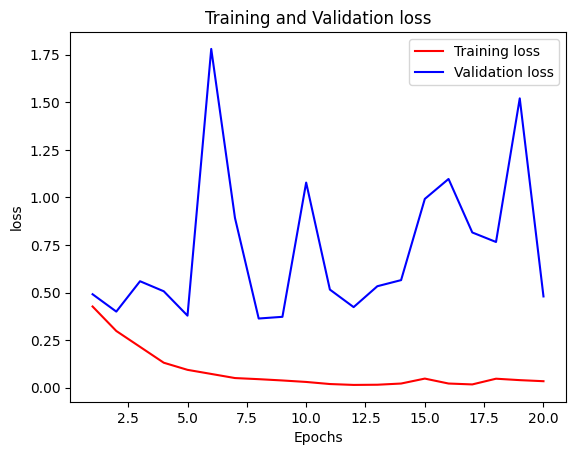

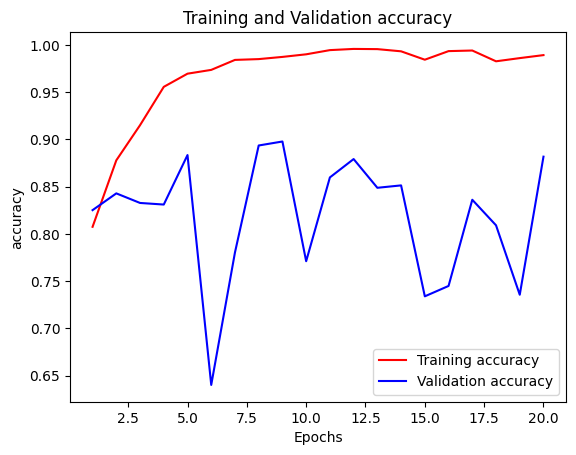

In [21]:
check_metrics(history_conv, 'loss')
check_metrics(history_conv, 'accuracy')

7. Напишите вывод о том, при какой архитектуре нейронной сети качество получилось лучше и почему. Также укажите в выводе, какие методы препроцессинга, регуляризации или гиперпараметры дали наибольший прирост к точности.

### Вывод:

В данной задаче сверточная архитектура нейронной сети показала лучшие результаты.
- В первой модели лучшая валидационная точность составила 0.7399 на 12 эпохе.
- Во второй модели лучшая валидационная точность 0.8978 была достигнута уже на 9 эпохе.

Это связано с тем, что обычная полносвязная нейронная сеть недостаточно способна учиться на локальных признаках из-за высокой размерности изображений, а сверточная нейронная сеть способна извлекать пространственные и временные зависимости в изображениях. Регуляризация BatchNormalization и препроцессинг Rescaling также хорошо повлияли на качество модели.